In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [55]:
fname = 'experiment3_1/simulated1_c4_e0.01_k21.dist'

In [56]:
from covest import *
hist_orig, hist = load_hist(fname)

In [57]:
hist

[0, 799096, 253154, 217950, 139743, 73288, 32114, 11503, 3671, 1050, 269, 51]

In [58]:
model = BasicModel(21, 100, hist)

In [59]:
model.compute_loglikelihood(10, 0.05)

-2698521.2117205486

In [122]:
count = 10
base_c = 5
range_c = 5
step_c = range_c/count
base_e = 0.02
range_e = 0.02
step_e = range_e/count

c_vals = arange(base_c - range_c, base_c + range_c, step_c)
e_vals = arange(base_e - range_e, base_e + range_e, step_e)

f1 = np.array([[model.compute_loglikelihood(c, e) for e in e_vals] for c in c_vals])
f1[isinf(f1)] = NaN


In [123]:
def prettify(a):
    min_val, max_val = nanmin(f1), nanmax(f1)    
    print(min_val - max_val - 1)
    def transform(x):
        return log(1 - ((x - min_val) / (max_val - min_val + 1)))
    vtransform = vectorize(transform)
    return vtransform(a)

-4708034.49777


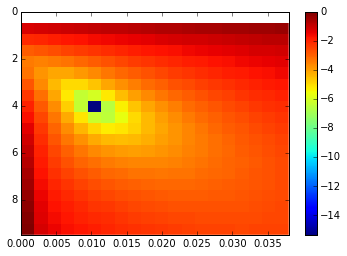

In [126]:
ax = imshow(prettify(f1), interpolation='none', cmap = 'jet', extent=[e_vals[0],e_vals[-1],c_vals[-1],c_vals[0]], aspect='auto')
colorbar(ax)
show()